# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
 #Dependencies
import requests
import json
import gmaps
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time 
from scipy.stats import linregress
from citipy import citipy

# Google developer API key
from api_keys import g_key
from api_keys import weather_api_key
temp_units = "imperial"

# Access maps with unique API key
gmaps.configure(api_key=g_key)


## Generate Cities List

In [2]:
lat_range = (-90, 90)
long_range= (-180, 180)
# list of cities to query
cities = []

# Create a set of random lat and lng combinations
lat = np.random.uniform(low=-90.000, high=90.000, size=1500)
long = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lon = zip(lat, long)

for value in lat_lon:
    city = citipy.nearest_city(value[0], value[1]).city_name
    if city not in cities:
        cities.append(city)


len(cities)

  

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# list for response results
lat = []
long = []
cloudiness = []
humidities = []
temp = []
wind_speed = []
country_d = []
date = []
cityname = []


response= requests.post(query_url)

# loop through cities, make API request, and append desired results
x= 0
for city in cities:
    try:
        response = requests.get(query_url+city).json()  
        x = x+1
        print(f"Processing Record {x} | {city}")
#     except:
#         print("City not found. Skip")
        
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidities.append(response['main']['humidity'])
        temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        country_d.append(response["sys"]['country'])
        date.append(response["dt"])
        cityname.append(response["name"])
    except:
        print("City not found. Skip")
print("------------------------------\nData Retrieval Complete\n------------------------------")

Processing Record 1 | rikitea
Processing Record 2 | busselton
Processing Record 3 | khatanga
Processing Record 4 | hermanus
Processing Record 5 | jamestown
Processing Record 6 | amapa
Processing Record 7 | bilibino
Processing Record 8 | matagalpa
Processing Record 9 | yellowknife
Processing Record 10 | grand river south east
City not found. Skip
Processing Record 11 | mahebourg
Processing Record 12 | saldanha
Processing Record 13 | albany
Processing Record 14 | hilo
Processing Record 15 | fuyu
Processing Record 16 | banikoara
Processing Record 17 | thompson
Processing Record 18 | rio de mouro
Processing Record 19 | bredasdorp
Processing Record 20 | punta arenas
Processing Record 21 | shar
Processing Record 22 | bonthe
Processing Record 23 | amsterdam
Processing Record 24 | barrow
Processing Record 25 | bathsheba
Processing Record 26 | ushuaia
Processing Record 27 | bairiki
Processing Record 28 | nikolskoye
Processing Record 29 | mutis
Processing Record 30 | taksimo
Processing Record 31

Processing Record 237 | soyo
Processing Record 238 | provideniya
Processing Record 239 | meleuz
Processing Record 240 | kodiak
Processing Record 241 | piranshahr
Processing Record 242 | touros
Processing Record 243 | aswan
Processing Record 244 | malanville
Processing Record 245 | margate
Processing Record 246 | la ferte-bernard
Processing Record 247 | jardim
Processing Record 248 | shamary
Processing Record 249 | akureyri
Processing Record 250 | brae
Processing Record 251 | sampit
Processing Record 252 | ushumun
Processing Record 253 | aksarka
Processing Record 254 | quelimane
Processing Record 255 | yerbogachen
Processing Record 256 | eureka
Processing Record 257 | tarauaca
Processing Record 258 | vestmannaeyjar
Processing Record 259 | hamilton
Processing Record 260 | dunedin
Processing Record 261 | batticaloa
Processing Record 262 | kashi
Processing Record 263 | norman wells
Processing Record 264 | viligili
City not found. Skip
Processing Record 265 | oranjemund
Processing Record 26

Processing Record 466 | mahajanga
Processing Record 467 | rotterdam
Processing Record 468 | nouakchott
Processing Record 469 | punalur
Processing Record 470 | gamba
Processing Record 471 | nador
Processing Record 472 | merauke
Processing Record 473 | srednekolymsk
Processing Record 474 | bokspits
City not found. Skip
Processing Record 475 | havre-saint-pierre
Processing Record 476 | teguldet
Processing Record 477 | narasannapeta
Processing Record 478 | ketchikan
Processing Record 479 | cheuskiny
City not found. Skip
Processing Record 480 | tamazulapam
City not found. Skip
Processing Record 481 | byron bay
Processing Record 482 | coihaique
Processing Record 483 | sao jose da coroa grande
Processing Record 484 | torata
Processing Record 485 | springbok
Processing Record 486 | san diego de los banos
Processing Record 487 | kamskiye polyany
Processing Record 488 | ilo
Processing Record 489 | businga
Processing Record 490 | kruisfontein
Processing Record 491 | khandyga
Processing Record 492

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
# Creating a dictionary
df = ({"City": cityname, "Lat": lat, "Lng": long, "Max Temp": temp, 
        "Humidity": humidities, "Cloudiness": cloudiness, "Wind Speed": wind_speed, 
        "Country": country_d, "Date": date})
# Making a dataframe
df2=pd.DataFrame(df)


# Converting to a csv file and saving it in the output_data folder - DataFrame.to_csv()
weather_csv = df2.to_csv('C:/Users/anjan/OneDrive/Desktop/boot_camp/python-api-challenge/output_data/weather.csv', index = False) 
weather_csv = pd.read_csv('../output_data/weather.csv')
weather_csv

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,71.98,77,49,20.69,PF,1600789833
1,Busselton,-33.65,115.33,48.99,71,29,6.85,AU,1600789401
2,Khatanga,71.97,102.50,47.35,69,14,10.13,RU,1600789834
3,Hermanus,-34.42,19.23,64.99,63,0,3.00,ZA,1600789834
4,Jamestown,42.10,-79.24,61.00,62,1,5.17,US,1600789834
...,...,...,...,...,...,...,...,...,...
546,Maputo,-25.97,32.59,69.80,56,75,5.82,MZ,1600789975
547,Yatou,37.15,122.38,63.55,74,98,5.86,CN,1600789975
548,Forsytheganj,52.63,29.73,61.95,62,0,6.29,BY,1600789975
549,Leh,34.17,77.58,55.42,32,3,1.99,IN,1600789976


In [11]:
# Getting basic statistics
weather_csv.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,19.885608,17.730708,66.405172,67.952813,47.568058,8.234973,1.600790e+09
std,33.672998,89.958820,16.970253,21.760046,37.763744,5.485582,1.138221e+02
min,-54.800000,-179.170000,14.500000,6.000000,0.000000,0.400000,1.600789e+09
25%,-8.315000,-58.695000,53.930000,57.000000,9.500000,4.295000,1.600790e+09
50%,22.290000,19.230000,68.000000,73.000000,40.000000,7.000000,1.600790e+09
75%,50.215000,96.270000,78.800000,83.000000,88.000000,11.410000,1.600790e+09
max,78.220000,178.420000,111.220000,100.000000,100.000000,32.210000,1.600790e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
# Inspecting the data to check the cities where humidity > 100%
humidities = weather_csv[weather_csv['Humidity'] > 100]
humidities.head()
# There are no cities where humidity is over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [17]:
#  Get the indices of cities that have humidity over 100%.
# There are no cities where humidity is over 100%

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# There are no cities where humidity is over 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

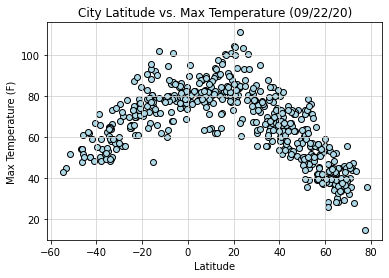

In [34]:
# Plot Latitude vs. Temperature
x= weather_csv['Lat']
y = weather_csv['Max Temp']

#plt.scatter(x, y, marker = "o", facecolors = "lightblue", edgecolors = "black", ax=ax)
plt.scatter(x, y, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")

plt.savefig("../output_data/fig1.png")
plt.title("City Latitude vs. Max Temperature (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

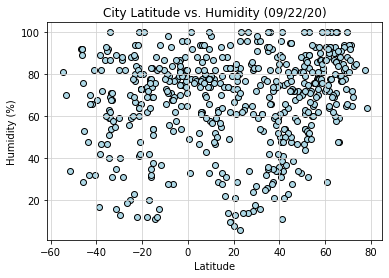

In [35]:
# Plot Latitude vs. Humidity
x= weather_csv['Lat']
y = weather_csv['Humidity']


plt.scatter(x, y, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")

plt.savefig("../output_data/fig2.png")
plt.title("City Latitude vs. Humidity (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

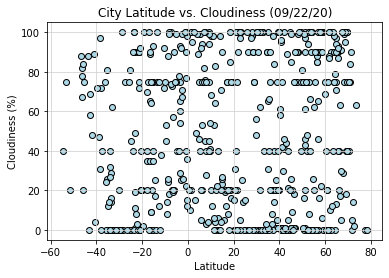

In [36]:
# Plot Latitude vs. Cloudiness
x= weather_csv['Lat']
y = weather_csv['Cloudiness']


plt.scatter(x, y, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")

plt.savefig("../output_data/fig3.png")
plt.title("City Latitude vs. Cloudiness (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

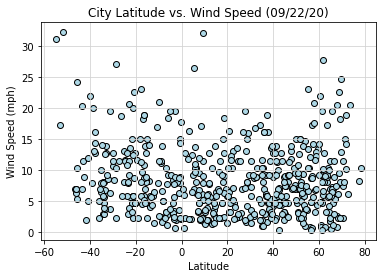

In [37]:
# Plot Latitude vs. Wind Speed
x= weather_csv['Lat']
y = weather_csv['Wind Speed']


plt.scatter(x, y, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.grid (b=True, which="major", axis="both", linestyle="-", color="lightgrey")

plt.savefig("../output_data/fig4.png")
plt.title("City Latitude vs. Wind Speed (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

In [38]:
# Linear Regression Northern Hemisphere Latitude vs. Temperature
# Creating Northern and Southern Hemisphere DataFrames. the latitude of the equator is 0. so 
North_df = weather_csv.loc[weather_csv["Lat"]>0]
South_df = weather_csv.loc[weather_csv["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8433952883639975


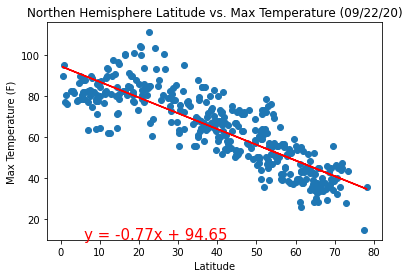

In [41]:
x= North_df['Lat']
y = North_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig5.png")
plt.title("Northen Hemisphere Latitude vs. Max Temperature (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7499077702023956


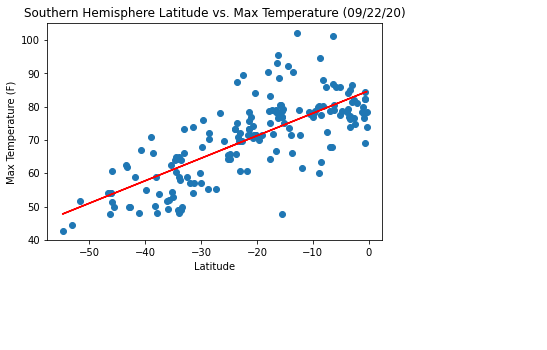

In [42]:
x= South_df['Lat']
y = South_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig6.png")
plt.title("Southern Hemisphere Latitude vs. Max Temperature (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
print(f"The r-value is: {rvalue}")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.19548479528853419


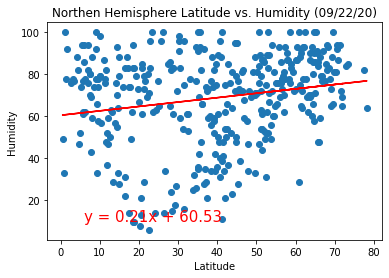

In [43]:
x= North_df['Lat']
y = North_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig7.png")
plt.title("Northen Hemisphere Latitude vs. Humidity (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.15141443155879786


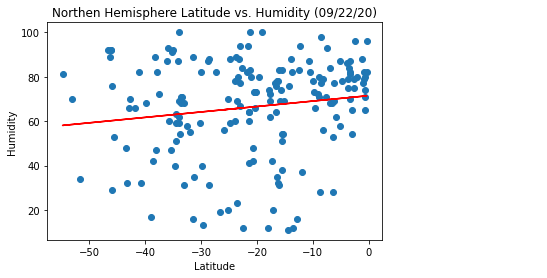

In [44]:
x= South_df['Lat']
y = South_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig8.png")
plt.title("Northen Hemisphere Latitude vs. Humidity (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.06382783186370929


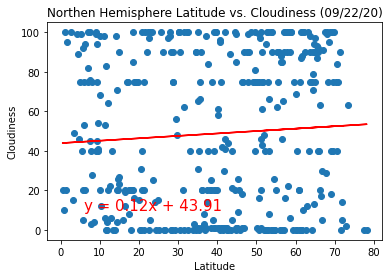

In [46]:
x= North_df['Lat']
y = North_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig9.png")
plt.title("Northen Hemisphere Latitude vs. Cloudiness (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.1844844542541771


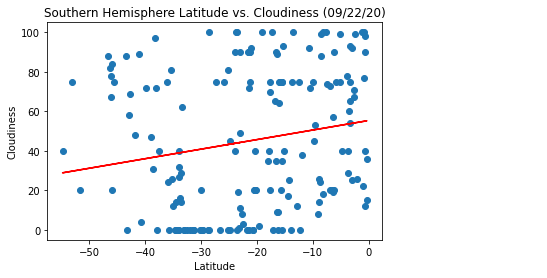

In [47]:
x= South_df['Lat']
y = South_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig10.png")
plt.title("Southern Hemisphere Latitude vs. Cloudiness (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.104911616060429


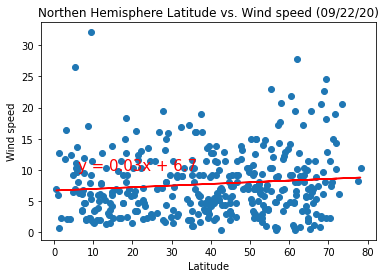

In [48]:
x= North_df['Lat']
y = North_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig11.png")
plt.title("Northen Hemisphere Latitude vs. Wind speed (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.25583125090213765


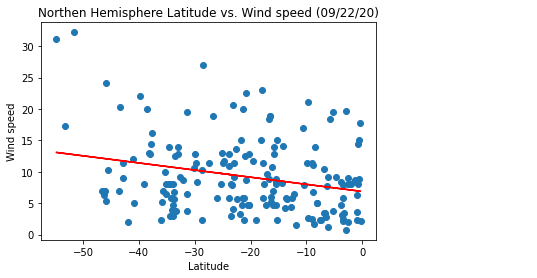

In [49]:
x= South_df['Lat']
y = South_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.savefig("../output_data/fig12.png")
plt.title("Northen Hemisphere Latitude vs. Wind speed (09/22/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind speed")
print(f"The r-value is: {rvalue}")
plt.show()